# Kalman Matrices

In [4]:
# Write a function 'kalman_filter' that implements a multi-
# dimensional Kalman Filter for the example given

from math import *


class matrix:
    
    # implements basic operations of a matrix class
    
    def __init__(self, value):
        self.value = value
        self.dimx = len(value)
        self.dimy = len(value[0])
        if value == [[]]:
            self.dimx = 0
    
    def zero(self, dimx, dimy):
        # check if valid dimensions
        if dimx < 1 or dimy < 1:
            raise ValueError, "Invalid size of matrix"
        else:
            self.dimx = dimx
            self.dimy = dimy
            self.value = [[0 for row in range(dimy)] for col in range(dimx)]
    
    def identity(self, dim):
        # check if valid dimension
        if dim < 1:
            raise ValueError, "Invalid size of matrix"
        else:
            self.dimx = dim
            self.dimy = dim
            self.value = [[0 for row in range(dim)] for col in range(dim)]
            for i in range(dim):
                self.value[i][i] = 1
    
    def show(self):
        for i in range(self.dimx):
            print(self.value[i])
        print(' ')
    
    def __add__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise ValueError, "Matrices must be of equal dimensions to add"
        else:
            # add if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] + other.value[i][j]
            return res
    
    def __sub__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise ValueError, "Matrices must be of equal dimensions to subtract"
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] - other.value[i][j]
            return res
    
    def __mul__(self, other):
        # check if correct dimensions
        if self.dimy != other.dimx:
            raise ValueError, "Matrices must be m*n and n*p to multiply"
        else:
            # multiply if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, other.dimy)
            for i in range(self.dimx):
                for j in range(other.dimy):
                    for k in range(self.dimy):
                        res.value[i][j] += self.value[i][k] * other.value[k][j]
            return res
    
    def transpose(self):
        # compute transpose
        res = matrix([[]])
        res.zero(self.dimy, self.dimx)
        for i in range(self.dimx):
            for j in range(self.dimy):
                res.value[j][i] = self.value[i][j]
        return res
    
    # Thanks to Ernesto P. Adorio for use of Cholesky and CholeskyInverse functions
    
    def Cholesky(self, ztol=1.0e-5):
        # Computes the upper triangular Cholesky factorization of
        # a positive definite matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        for i in range(self.dimx):
            S = sum([(res.value[k][i])**2 for k in range(i)])
            d = self.value[i][i] - S
            if abs(d) < ztol:
                res.value[i][i] = 0.0
            else:
                if d < 0.0:
                    raise ValueError, "Matrix not positive-definite"
                res.value[i][i] = sqrt(d)
            for j in range(i+1, self.dimx):
                S = sum([res.value[k][i] * res.value[k][j] for k in range(self.dimx)])
                if abs(S) < ztol:
                    S = 0.0
                res.value[i][j] = (self.value[i][j] - S)/res.value[i][i]
        return res
    
    def CholeskyInverse(self):
        # Computes inverse of matrix given its Cholesky upper Triangular
        # decomposition of matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        # Backward step for inverse.
        for j in reversed(range(self.dimx)):
            tjj = self.value[j][j]
            S = sum([self.value[j][k]*res.value[j][k] for k in range(j+1, self.dimx)])
            res.value[j][j] = 1.0/tjj**2 - S/tjj
            for i in reversed(range(j)):
                res.value[j][i] = res.value[i][j] = -sum([self.value[i][k]*res.value[k][j] for k in range(i+1, self.dimx)])/self.value[i][i]
        return res
    
    def inverse(self):
        aux = self.Cholesky()
        res = aux.CholeskyInverse()
        return res
    
    def __repr__(self):
        return repr(self.value)


########################################

# Implement the filter function below

def kalman_filter(x, P):
    for n in range(len(measurements)):
        
        # measurement update
        Z = matrix([[measurements[n]]]) # Matric measurements
        y = Z - (H * x) # Error Calculation
        S = H * P * H.transpose() + R # Matric S
        K = P * H.transpose() * S.inverse() # Kalman Gain
        x = x + (K * y) # Next prediction
        
        P = (I - (K * H )) * P # Measurment update
        
        # prediction
        x = (F * x) + u
        P = F * P * F.transpose()
        
    return x,P

############################################
### use the code below to test your filter!
############################################

measurements = [1, 2, 3]

x = matrix([[0.], [0.]]) # initial state (location and velocity)
P = matrix([[1000., 0.], [0., 1000.]]) # initial uncertainty
u = matrix([[0.], [0.]]) # external motion
F = matrix([[1., 1.], [0, 1.]]) # next state function
H = matrix([[1., 0.]]) # measurement function
R = matrix([[1.]]) # measurement uncertainty
I = matrix([[1., 0.], [0., 1.]]) # identity matrix

print(kalman_filter(x, P))
# output should be:
# x: [[3.9996664447958645], [0.9999998335552873]]
# P: [[2.3318904241194827, 0.9991676099921091], [0.9991676099921067, 0.49950058263974184]]


SyntaxError: invalid syntax (<ipython-input-4-aec107a2473d>, line 21)

---
# Overview of the Kalman Filter Algorithm Map

<img src="lesson/images/KalmanFilter.png">

For your reference: a map of the Kalman Filter algorithm! Keep an eye out, because we'll add a little bit more detail to this later.
Imagine you are in a car equipped with sensors on the outside. The car sensors can detect objects moving around: for example, the sensors might detect a bicycle.

The Kalman Filter algorithm will go through the following steps:

- first measurement - the filter will receive initial measurements of the bicycle's position relative to the car. These measurements will come from a radar or lidar sensor.
- initialize state and covariance matrices - the filter will initialize the bicycle's position based on the first measurement.
- then the car will receive another sensor measurement after a time period Δt.
- predict - the algorithm will predict where the bicycle will be after time Δt. One basic way to predict the bicycle location after Δt is to assume the bicycle's velocity is constant; thus the bicycle will have moved velocity * Δt. In the extended Kalman filter lesson, we will assume the velocity is constant; in the unscented Kalman filter lesson, we will introduce a more complex motion model.
- update - the filter compares the "predicted" location with what the sensor measurement says. The predicted location and the measured location are combined to give an updated location. The Kalman filter will put more weight on either the predicted location or the measured location depending on the uncertainty of each value.
- then the car will receive another sensor measurement after a time period Δt. The algorithm then does another predict and update step.

# Kalman Filter Equations in C++ Part 1

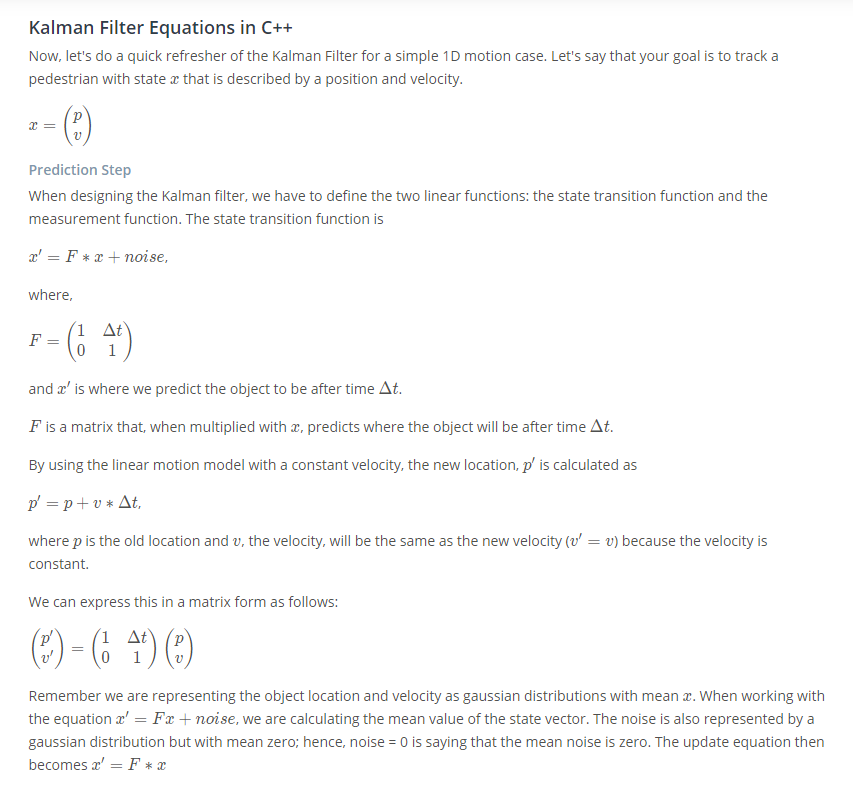

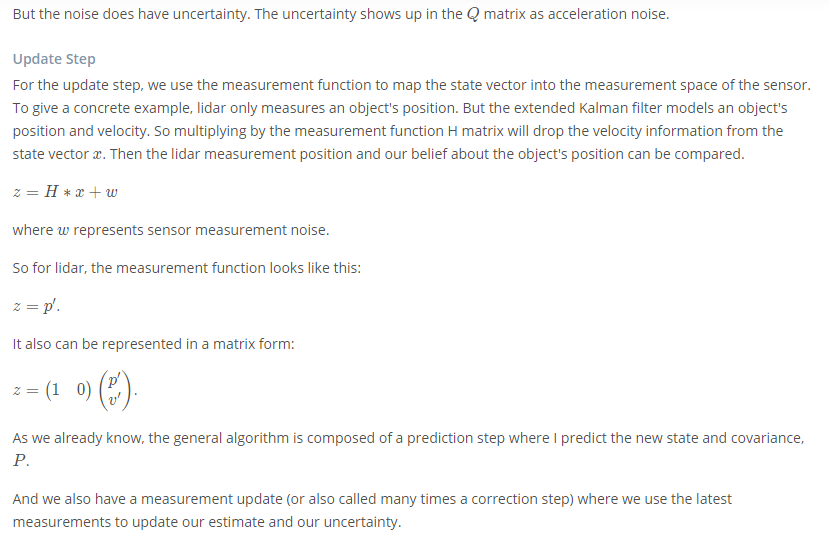
